In [20]:
# -*- coding: utf-8 -*-
"""
Created on Thu Apr 17 12:47:58 2025

@author: Pacific
"""

import numpy as np
import random as rd
import pandas as pd
import secrets as st
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter

# =============================================================================
# simulation
# =============================================================================
time_step = 1
def initialize() :
    global N, L, x_positions, y_positions, directions, order_parameters
    x_positions = [ [st.SystemRandom().uniform(0, L) for _ in range(N)] ]
    y_positions = [ [st.SystemRandom().uniform(0, L) for _ in range(N)] ]
    directions = [ [st.SystemRandom().uniform(0, 2*np.pi) for _ in range(N)] ]
    #order parameter
    v_xs = np.cos(directions[0])
    v_ys = np.sin(directions[0])
    order_parameter = ( np.mean(v_xs)**2 + np.mean(v_ys)**2 )**0.5
    order_parameters = [order_parameter]

def update0() :
    global R, v, etta
    xs = x_positions[-1]
    ys = y_positions[-1]
    v_xs = [ v*np.cos(i) for i in directions[-1] ]
    v_ys = [ v*np.sin(i) for i in directions[-1] ]
    #positions update
    new_xs = [ (xs[n] + time_step*v_xs[n])%L for n in range(N) ]
    new_ys = [ (ys[n] + time_step*v_ys[n])%L for n in range(N) ]
    x_positions.append(new_xs)
    y_positions.append(new_ys)
    #direction update
    new_dirs = []
    for n in range(N) :
        n_neighbors_dir = []
        for j in range(N) :
            dx = min( xs[n]-xs[j], 1-(xs[n]-xs[j]) )
            dy = min( ys[n]-ys[j], 1-(ys[n]-ys[j]) )
            if (dx**2 + dy**2)**0.5 < R :
                n_neighbors_dir.append(directions[-1][j])
        new_dir = np.mean(n_neighbors_dir) + rd.uniform(-etta/2, etta/2)
        new_dirs.append(new_dir)
    directions.append(new_dirs)
    #order parameter
    v_xs = [ v*np.cos(i) for i in directions[-1] ]
    v_ys = [ v*np.sin(i) for i in directions[-1] ]
    order_parameter = ( np.mean(v_xs)**2 + np.mean(v_ys)**2 )**0.5
    order_parameters.append(order_parameter)


In [18]:
N = 200
L = 5
v = 2
R = 0.2
etta = 0.1

In [5]:
initialize()
for t in range(100) :
  update0()
T = len(order_parameters)
individual_particle = rd.randint(0, N-1)

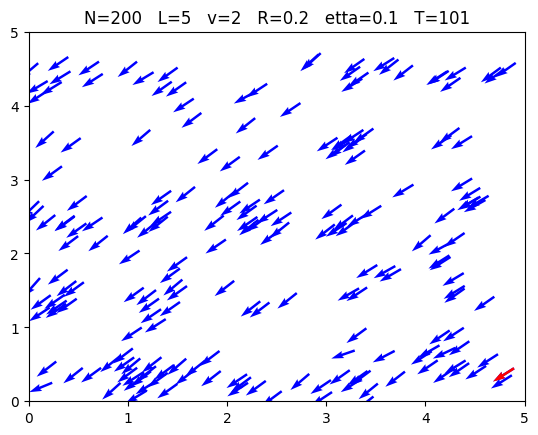

In [21]:
fig, ax = plt.subplots()
ax.set_xlim(0, L)
ax.set_ylim(0, L)
quiver = ax.quiver(x_positions[0], y_positions[0],
                    np.cos(directions[0]), np.sin(directions[0]),
          color='blue', scale=20, width=0.005)
individual_arrow = ax.quiver([x_positions[0][individual_particle]],
                            [y_positions[0][individual_particle]],
                            [np.cos(directions[0][individual_particle])],
                            [np.sin(directions[0][individual_particle])],
                            color='red', scale=20, width=0.005)
def update(frame):
  quiver.set_offsets(np.column_stack((x_positions[frame], y_positions[frame])))
  quiver.set_UVC(np.cos(directions[frame]), np.sin(directions[frame]))
  individual_arrow.set_offsets(np.column_stack((
            [x_positions[frame][individual_particle]],
            [y_positions[frame][individual_particle]])))
  individual_arrow.set_UVC([np.cos(directions[frame][individual_particle])],
                           [np.sin(directions[frame][individual_particle])])
  return quiver, individual_arrow,
ani = FuncAnimation(fig, update, frames=T, interval=300, blit=True)
ax.set_title(f"N={N}   L={L}   v={v}   R={R}   etta={etta}   T={T}")
ani.save(f"animation_Vicsek{t}.mp4")